In [27]:
import torch
from torch.distributions import Normal, MultivariateNormal
from torch.distributions.lowrank_multivariate_normal import LowRankMultivariateNormal

from cnp.output import (
    OutputLayer,
    MeanFieldGaussianLayer,
    InnerprodGaussianLayer,
    KvvGaussianLayer,
    LogLogitCopulaLayer
)

from cnp.utils import Gamma

import matplotlib.pyplot as plt

# Mean field layer

In [2]:
mfg_layer = MeanFieldGaussianLayer()

In [3]:
B = 1
T = 7
C = 2

tensor = torch.rand(B, T, C)

mfg_layer.mean_and_cov(tensor)

(tensor([[0.9907, 0.2055, 0.3128, 0.5486, 0.7850, 0.4126, 0.9014]]),
 tensor([[[0.8355, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0203, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.2857, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.8214, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.1164, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0794, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7060]]]),
 tensor([[[1.5287, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.7135, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.9788, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 1.5145, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 1.8096, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.7725, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0

In [4]:
B = 2
T = 7
C = 2

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

mfg_layer.loglik(tensor, y_target)

tensor([-8.3734, -8.4363], grad_fn=<SubBackward0>)

In [5]:
B = 1
T = 7
C = 2
num_samples = 3

tensor = torch.rand(B, T, C)

print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(mfg_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([3, 1, 7])
torch.Size([3, 1, 7])


# Innerprod layer

In [6]:
num_embedding = 100
noise_type = "hetero"

innerprod_layer = InnerprodGaussianLayer(num_embedding=num_embedding,
                                         noise_type=noise_type)

In [7]:
B = 1
T = 7
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)

innerprod_layer.mean_and_cov(tensor)

(tensor([[0.6851, 0.7002, 0.8675, 0.6562, 0.0454, 0.9180, 0.2623]]),
 tensor([[[0.3061, 0.2401, 0.2434, 0.2654, 0.2246, 0.2500, 0.2134],
          [0.2401, 0.3540, 0.2587, 0.2613, 0.2372, 0.2421, 0.2405],
          [0.2434, 0.2587, 0.3342, 0.2755, 0.2488, 0.2414, 0.2443],
          [0.2654, 0.2613, 0.2755, 0.3613, 0.2376, 0.2634, 0.2596],
          [0.2246, 0.2372, 0.2488, 0.2376, 0.3094, 0.2187, 0.2206],
          [0.2500, 0.2421, 0.2414, 0.2634, 0.2187, 0.3216, 0.2211],
          [0.2134, 0.2405, 0.2443, 0.2596, 0.2206, 0.2211, 0.3028]]]),
 tensor([[[1.4425, 0.2401, 0.2434, 0.2654, 0.2246, 0.2500, 0.2134],
          [0.2401, 1.1134, 0.2587, 0.2613, 0.2372, 0.2421, 0.2405],
          [0.2434, 0.2587, 1.4233, 0.2755, 0.2488, 0.2414, 0.2443],
          [0.2654, 0.2613, 0.2755, 1.4179, 0.2376, 0.2634, 0.2596],
          [0.2246, 0.2372, 0.2488, 0.2376, 1.2361, 0.2187, 0.2206],
          [0.2500, 0.2421, 0.2414, 0.2634, 0.2187, 1.2799, 0.2211],
          [0.2134, 0.2405, 0.2443, 0.2596, 0

In [8]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 66.3 ms, sys: 30.4 ms, total: 96.6 ms
Wall time: 53.4 ms


In [9]:
B = 3
T = 10000
C = num_embedding + 1 + int(noise_type == "hetero")
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

%time _ = innerprod_layer.loglik(tensor, y_target)

CPU times: user 49.9 ms, sys: 6.3 ms, total: 56.2 ms
Wall time: 30.6 ms


# Kvv layer

In [10]:
num_embedding = 10
noise_type = "homo"

kvv_layer = KvvGaussianLayer(num_embedding=num_embedding,
                             noise_type=noise_type)

In [11]:
B = 1
T = 7
C = 12

tensor = torch.rand(B, T, C)

kvv_layer.mean_and_cov(tensor)

(tensor([[0.4459, 0.3718, 0.9153, 0.1374, 0.4257, 0.5128, 0.9051]]),
 tensor([[[0.0795, 0.0178, 0.0295, 0.1719, 0.0618, 0.0767, 0.0487],
          [0.0178, 0.0310, 0.0196, 0.0623, 0.0268, 0.0432, 0.0185],
          [0.0295, 0.0196, 0.0422, 0.1352, 0.0274, 0.0444, 0.0286],
          [0.1719, 0.0623, 0.1352, 0.7060, 0.1056, 0.2274, 0.1754],
          [0.0618, 0.0268, 0.0274, 0.1056, 0.1331, 0.0604, 0.0332],
          [0.0767, 0.0432, 0.0444, 0.2274, 0.0604, 0.2310, 0.0642],
          [0.0487, 0.0185, 0.0286, 0.1754, 0.0332, 0.0642, 0.0564]]]),
 tensor([[[0.7726, 0.0178, 0.0295, 0.1719, 0.0618, 0.0767, 0.0487],
          [0.0178, 0.7242, 0.0196, 0.0623, 0.0268, 0.0432, 0.0185],
          [0.0295, 0.0196, 0.7353, 0.1352, 0.0274, 0.0444, 0.0286],
          [0.1719, 0.0623, 0.1352, 1.3992, 0.1056, 0.2274, 0.1754],
          [0.0618, 0.0268, 0.0274, 0.1056, 0.8263, 0.0604, 0.0332],
          [0.0767, 0.0432, 0.0444, 0.2274, 0.0604, 0.9241, 0.0642],
          [0.0487, 0.0185, 0.0286, 0.1754, 0

In [12]:
B = 3
T = 7
C = 12

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

kvv_layer.loglik(tensor, y_target)

tensor([-7.2864, -6.2461, -7.3889], grad_fn=<SubBackward0>)

In [13]:
B = 3
T = 7
C = 12
num_samples = 5

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=False).shape)
print(kvv_layer.sample(tensor, num_samples=num_samples, noiseless=True).shape)

torch.Size([5, 3, 7])
torch.Size([5, 3, 7])


# Log-logit copula layer

In [164]:
# =============================================================================
# Log-logit copula output layer
# =============================================================================

class LogLogitCopulaLayer(OutputLayer):
    
    
    def __init__(self, gaussian_layer):
        
        super().__init__()
        
        # Initialise Gaussian layer
        self.gaussian_layer = gaussian_layer
        
        # Number of features equal to number of Gaussian layer features plus
        # two additional features for the Gamma - rate and concentration
        self.num_features = self.gaussian_layer.num_features + 2

    
    def loglik(self, tensor, y_target):
        """
        Arguments:
            tensor   : torch.tensor, (B, T, C)
            y_target : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Unpack parameters and apply inverse transformation
        tensor, a, b = self.unpack_parameters(tensor=tensor)
        v_target = self.inverse_marginal_transformation(x=y_target,
                                                        a=a,
                                                        b=b)
        
        # Log-likelihood of transformed variables under Gaussian
        loglik = self.gaussian_layer.loglik(tensor=tensor, y_target=v_target)
        
        # Compute change-of-variables contribution (Jacobian is diagonal)
        grad = self.inverse_marginal_transformation(x=y_target,
                                                    a=a,
                                                    b=b,
                                                    grad=True)
        jacobian_term = torch.sum(torch.log(torch.abs(grad)), dim=-1)
        
        # Ensure shapes are compatible
        assert loglik.shape == jacobian_term.shape
        
        return loglik + jacobian_term

    
    def sample(self, tensor, num_samples, noiseless):
        """
        Arguments:
            tensor      : torch.tensor, (B, T, C)
            num_samples : int, number of samples to draw
            noiseless   : bool, whether to include the noise term
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Unpack parameters and apply inverse transformation
        tensor, a, b = self.unpack_parameters(tensor=tensor)
        
        # Draw samples from Gaussian and apply marginal transformation
        v_samples = self.gaussian_layer.sample(tensor=tensor,
                                               num_samples=num_samples)
        
        samples = self.marginal_transformation(v_samples, a=a, b=b)
        
        return samples
        
        
    def unpack_parameters(self, tensor):
        """
        Arguments:
            tensor : torch.tensor, (B, T, C)
            
        Returns:
            tensor : torch.tensor, (B, T, C-2)
            a      : torch.tensor, (B, T)
            b      : torch.tensor, (B, T)
        """
        
        # Check tensor has correct number of features
        assert (len(tensor.shape) == 3) and \
               (tensor.shape[-1] == self.num_features)
        
        # Get rate and concentration from tensor
        a = torch.nn.Softplus()(tensor[:, :, 0]) + 1e-3
        b = torch.nn.Softplus()(tensor[:, :, 1]) + 1e-3
        
        # Slice out rate and concentration
        tensor = tensor[:, :, 2:]
        
        return tensor, a, b
    
    
    def pdf(self, x, a, b):
        """
        Probability distribution function of the log-logistic distribution.
        
            PDF(x) = (b/a) * (x/a)^(b-1) / (1 + (x/a)^b)^2
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        return (b/a) * (x/a)**(b-1) / (1+(x/a)**b)**2
    
    
    def cdf(self, x, a, b):
        """
        Cumulative distribution function of the log-logistic distribution.
        
            CDF(x) = 1 / (1 + (x/a)^-b)
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        return 1 / (1+(x/a)**-b)
    
    
    def icdf(self, x, a, b):
        """
        Inverse cumulative distribution function of the log-logistic
        distribution.
        
            CDF^-1(x) = a * (x^-1 - 1)^(-1/b)
        
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        return a * (x**-1 - 1) ** (-1/b)
    
    
    def marginal_transformation(self, x, a, b):
        """
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            tensor : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        
        zeros = torch.zeros(size=x.shape)
        ones = torch.ones(size=x.shape)
        
        gaussian = Normal(loc=zeros, scale=ones)
        
        x = gaussian.cdf(x)
        x = self.icdf(x, a, b)
        
        return x
        
        
    def inverse_marginal_transformation(self, x, a, b, grad=False):
        """
        Arguments:
            x : torch.tensor, (B, T)
            a : torch.tensor, (B, T)
            b : torch.tensor, (B, T)
            
        Returns:
            x : torch.tensor, (B, T)
        """
        
        # Check shapes are compatible, all x values are positive
        assert x.shape == a.shape == b.shape
        assert torch.all(x > 0.)
        
        zeros = torch.zeros(size=x.shape)
        ones = torch.ones(size=x.shape)
        
        gaussian = Normal(loc=zeros, scale=ones)
        
        if grad:
            x = self.pdf(x, a, b) * gaussian.icdf(self.cdf(x, a, b))
        
        else:
            x = self.cdf(x, a, b)
            x = gaussian.icdf(x)
        
        return x

In [165]:
num_embedding = 100
noise_type = "homo"

gaussian_layer = KvvGaussianLayer(num_embedding=num_embedding,
                                  noise_type=noise_type)

copula_layer = LogLogitCopulaLayer(gaussian_layer=gaussian_layer)

In [166]:
B = 3
T = 7
C = 104

tensor = torch.rand(B, T, C)
y_target = torch.rand(B, T)

copula_layer.loglik(tensor, y_target)

tensor([-27.5357, -29.3460, -25.3311], grad_fn=<AddBackward0>)

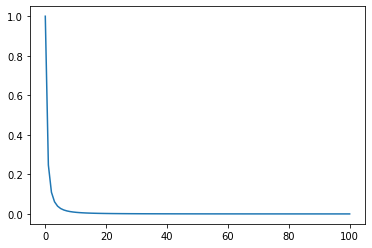

In [167]:
x = torch.linspace(1e-9, 100., 100)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

pdf = copula_layer.pdf(x, a, b).numpy()

plt.plot(x, pdf)
plt.show()

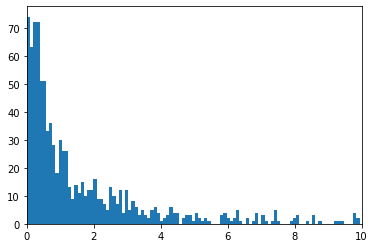

In [168]:
x = torch.rand(1000)
a = 1.*torch.ones_like(x)
b = 1.*torch.ones_like(x)

plt.hist(copula_layer.icdf(x, a, b).numpy(), bins=5000)
plt.xlim([0, 10])
plt.show()

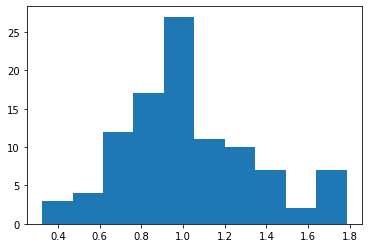

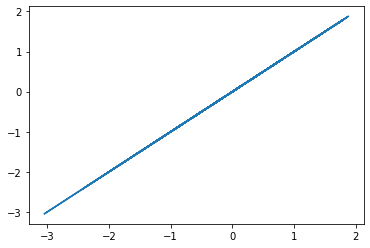

In [174]:
x = torch.randn(100)
a = 1.*torch.ones_like(x)
b = 6.*torch.ones_like(x)

y = copula_layer.marginal_transformation(x, a, b)

plt.hist(y.numpy())
plt.show()

x_ = copula_layer.inverse_marginal_transformation(y, a, b).numpy()

plt.plot(x, x_)
plt.show()